The expressions for the frequency modulations for triangular lattice beams:
\begin{eqnarray}
\delta \nu_1 (t) &=& 0\\
\delta \nu_2 (t) &=&  +\nu_x {\rm {sin}}(\Omega t) + \nu_y {\rm{cos}}(\Omega t) = \sqrt{\nu_x^2 +\nu_y^2} {\rm{sin}}(\Omega t + \alpha) \\
\delta \nu_3 (t) &=& -\nu_x {\rm {sin}}(\Omega t) + \nu_y {\rm{cos}}(\Omega t) =\sqrt{\nu_x^2 +\nu_y^2} {\rm{sin}}(\Omega t + \pi - \alpha)  \\
\alpha &=& \rm{arcsin}\left(\frac{\nu_y}{\sqrt{\nu_x^2+\nu_y^2}} \right)
\end{eqnarray}
The notation for the effective tunneling processes:
\begin{eqnarray}
J &\equiv& J_{21}^{\rm{eff}} \\
J' &\equiv& J_{32}^{\rm{eff}}  = J_{13}^{\rm{eff}} \\
J &=& {\rm{J_{B0}}} (K)J^{\rm{bare}}\\
J' &=& {\rm{J_{B0}}} (K')J^{\rm{bare}}\\
K &=& \frac{ma^2}{\hbar} \nu_y \\
K' &=& \frac{ma^2}{2\hbar} \sqrt{9 \nu_x^2 + \nu_y^2}
\end{eqnarray}
, where $ {\rm{J_{B0}}} $ means the 0-th order Bessel function of the first kind, $a = \frac{2}{3}\lambda$ the lattice constant, $m$ the atomic mass, and $\hbar$ the reduced Plant constant, respectively.

Load modules
==

In [1]:
import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)
from scipy.constants import * 
import matplotlib.pyplot as plt
from scipy.special import jv
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

numpy: 1.18.5
matplotlib: 3.2.2


Define constants
==

In [2]:
# lambda_L = 830*10**(-9) #wave lenght of triangular lattice beam [m]  Segstock group
lambda_L=1064*10**(-9) #QMBD
h_bar = h/(2*np.pi) #Converted Plank const
mrb = 87*10**(-3)/N_A
# mrb = 87*1.66053873*10**(-27) #Single atom mass of 87Rb [kg]
a = 2/3*lambda_L

Calculation
==

In [3]:
vy_list = np.linspace(0, 40,100)
K_list = mrb*a**2/h_bar*vy_list*10**3
Jv_list = jv(0, K_list)

x = np.linspace(0,25, 100)
y = np.linspace(0,40, 100)
X, Y = np.meshgrid(x, y)
Z = list(map(lambda vx, vy: jv(0,  mrb*a**2/(2*h_bar)*10**3*np.sqrt(9*vx**2+vy**2)), X,Y))

Plot figures
==

Text(0.5, 1.0, "$J'/J^{bare}$")

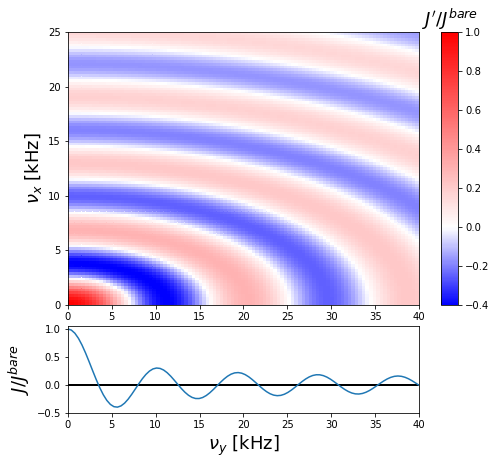

In [5]:
norm = mcolors.TwoSlopeNorm( vcenter=0.0, vmin=-0.4, vmax=1 )

fig =plt.figure(figsize=[7,7])
ax1 = fig.add_subplot(1,1,1)
mappable = ax1.pcolormesh(Y,X,Z, cmap='bwr', norm=norm) 
ax1.set_ylabel(r'$\nu_{x}$ [kHz]', size=18)
divider1 = make_axes_locatable(ax1)
ax1X = divider1.append_axes("bottom", 1.2, pad=0.3, sharex=ax1)
ax1X.plot(vy_list,Jv_list)
ax1X.set_ylabel(r"$J / J^{bare}$", size=18)
ax1X.set_xlabel(r'$\nu_{y}$ [kHz]',size=18)
ax1X.set_ylim(-0.5, 1.05)
ax1X.hlines(y=0,xmin=0, xmax=40, colors='black', linewidths=2)
ax_cb1 = divider1.append_axes("right",size="5%",pad=0.3)
pp=fig.colorbar(mappable,cax=ax_cb1)
pp.ax.set_title(r"$J'/J^{bare}$", fontname="Arial", fontsize=18)

Parameters
==

In [6]:
vx = 3.45 #Freq. modulation amplitude 1 [kHz]
vy = 0 #Freq. modulation amplitude 2 [kHz]

Results
==

In [7]:
k=mrb*a**2/h_bar*vy*10**3
kp = mrb*a**2/(2*h_bar)*10**3*np.sqrt(9*vx**2+vy**2)
j = jv(0,k)
jp = jv(0,kp)
amp = np.sqrt(vx**2+vy**2)
alpha = np.arcsin(vy/amp)
print('K=%.02f'%(k))
print('Kp=%.02f'%(kp))
print('J/J_bare=%.02f'%(j))
print('Jp/J_bare=%.02f'%(jp))
print('Amplitude=%.02f'%(amp)+"[kHz]")
print('theta = %.02f'%(alpha*180/np.pi)+"[degree]")


K=0.00
Kp=3.57
J/J_bare=1.00
Jp/J_bare=-0.39
Amplitude=3.45[kHz]
theta = 0.00[degree]
